In [39]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [42]:
#Read coordinate data into notebook
map_df=gpd.read_file('../Data/clean/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18..."


<AxesSubplot: >

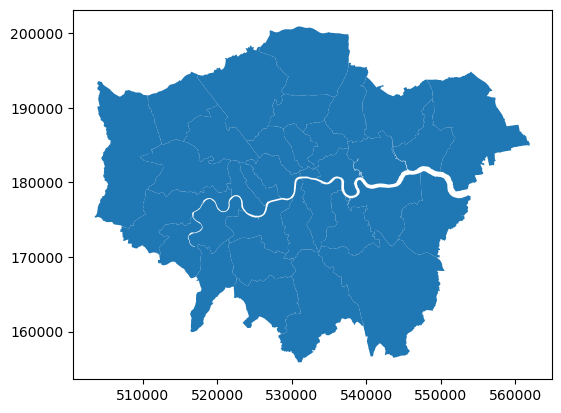

In [30]:
#Check map is correct
map_df.plot()

In [32]:
#Read crime data into notebook 
data = pd.read_csv('../Data/clean/house_price_groupby_data.csv')
data

,borough,year,month_name,average_house_price,number_of_crimes
0,Barking and Dagenham,2012,April,164731.04,1264
1,Barking and Dagenham,2012,August,166179.70,1269
2,Barking and Dagenham,2012,December,167813.02,1260
3,Barking and Dagenham,2012,February,163607.22,1307
4,Barking and Dagenham,2012,January,163899.02,1437
...,...,...,...,...,...
1975,Westminster,2016,March,971279.33,3703
1976,Westminster,2016,May,1007474.23,3789
1977,Westminster,2016,November,999384.17,4275
1978,Westminster,2016,October,961901.00,4093


In [36]:
#Groupby to get total number of crimes in each borough 
data=data.groupby(['borough']).agg({'number_of_crimes':'sum'})
data=data.reset_index()

In [37]:
#Join data frames to create a plot including number of crimes in the map
merged=map_df.set_index('NAME').join(data.set_index('borough'))
merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,number_of_crimes
NAME,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16...",48156
Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15...",141791
Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15...",99036
Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17...",106015
Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18...",133101


/var/folders/f5/ydbwqx010035kx3jpxc3gbfc0000gn/T/ipykernel_52479/709105743.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


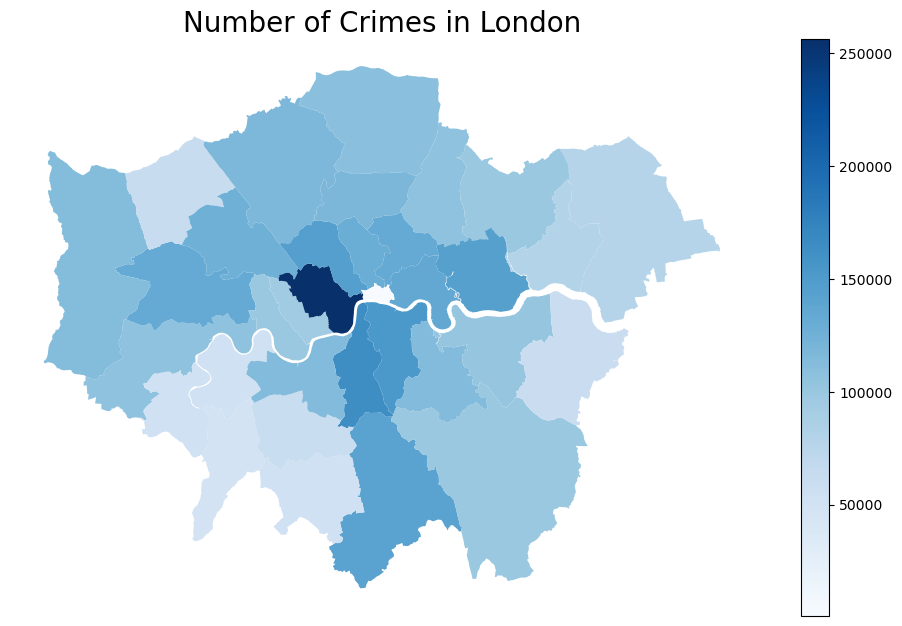

In [44]:
noc='number_of_crimes'
vmin,vmax=merged[noc].min(),merged[noc].max()
fig,ax=plt.subplots(1,figsize=(12,7.5))
merged.plot(column=noc,cmap='Blues',ax=ax)
ax.axis('off')
plt.title('Number of Crimes in London',{'fontsize': '20','fontweight' :'100'})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)